# Acknowledgement

Parts of this pset were inspired by
* Berkeley CS294-158, taught by Pieter Abbeel, Wilson Yan, Kevin Frans, and Philipp Wu;
* MIT 6.S184/6.S975, taught by Peter Holderrieth and Ezra Erives;
* The [blog post](https://lilianweng.github.io/posts/2021-07-11-diffusion-models/) about diffusion models by Lilian Weng.




# Submission Guideline for Part 2

Please include your answer to all problems, including formulas, proofs, and the figures generated in each problem, excluding code. You are required to submit the (single) pdf and all (four) notebooks (one for each problem) with your code and running outputs. Do not include code in the pdf file. 

Specifically, for Problem 1 in this notebook, the pdf should contain:
- Formulas and proofs for problem 1.1 and 1.2
- 4 figures, one for each beta schedule for problem 1.3
- Answers to the 2 short answer questions about different beta schedules in problem 1.3

# Problem 1: Preliminary and Math Preparations
In this problem, we will revisit some of the essential math derivations of diffusion models from the probabilistic perspective (referring to the [DDPM; Ho *et al.*, 2020](https://arxiv.org/pdf/2006.11239) paper). You will not need to use GPUs for this problem.

*Hint*: a careful reading of the [blog post](https://lilianweng.github.io/posts/2021-07-11-diffusion-models/) by Lilian Weng should reveal all of these questions

## 1.1 Diffusion Forward Process
Denote the target data distribution as $q(x)$. For each data point $x_0 \sim q(x)$, we can define a forward diffusion process where Gaussian noises are added to the sampling over $T$ steps as a Markov chain with a variance schedule $\beta_1,...,\beta_T \, (\beta_i\in (0,1), \forall \, i\in \{1,...,T\})$. This leads to $T$ latent variables $x_1,...,x_T$ following the distribution $q(x_{1:T}|x_0)$, defined as:
$$q(x_{1:T}|x_0):=\prod_{t=1}^T q(x_t|x_{t-1}), \ \ q(x_t|x_{t-1}):= \mathcal{N}(x_t; \sqrt{1-\beta_t}x_{t-1},\beta_t \mathbf{I})$$

Let $\alpha_t:=1-\beta_t$ and $\bar{\alpha_t}:=\prod_{i=1}^t \alpha_i$. Please fill in the formula of distributions below with a brief proof:

(1) $q(x_t|x_0)$ = $\mathcal{N}(\mathbf{x}_t; \sqrt{\bar{\alpha}_t} \mathbf{x}_0, (1 - \bar{\alpha}_t)\mathbf{I})$

*Proof Sketch:* Using the reparameterization trick $\mathbf{x}_t = \sqrt{\alpha_t}\mathbf{x}_{t-1} + \sqrt{\beta_t}\boldsymbol{\epsilon}_{t-1}$ and substituting recursively:
$\mathbf{x}_t = \sqrt{\alpha_t}(\sqrt{\alpha_{t-1}}\mathbf{x}_{t-2} + \sqrt{\beta_{t-1}}\boldsymbol{\epsilon}_{t-2}) + \sqrt{\beta_t}\boldsymbol{\epsilon}_{t-1}$
$= \sqrt{\alpha_t \alpha_{t-1}} \mathbf{x}_{t-2} + \sqrt{\alpha_t \beta_{t-1}} \boldsymbol{\epsilon}_{t-2} + \sqrt{\beta_t} \boldsymbol{\epsilon}_{t-1}$
The two noise terms $\sqrt{\alpha_t \beta_{t-1}} \boldsymbol{\epsilon}_{t-2}$ and $\sqrt{\beta_t} \boldsymbol{\epsilon}_{t-1}$ are independent Gaussians $\mathcal{N}(0, \alpha_t \beta_{t-1} \mathbf{I})$ and $\mathcal{N}(0, \beta_t \mathbf{I})$. Their sum is $\mathcal{N}(0, (\alpha_t \beta_{t-1} + \beta_t)\mathbf{I})$. Since $\beta_t = 1-\alpha_t$, the variance is $(\alpha_t(1-\alpha_{t-1}) + 1-\alpha_t)\mathbf{I} = (\alpha_t - \alpha_t\alpha_{t-1} + 1 - \alpha_t)\mathbf{I} = (1 - \alpha_t\alpha_{t-1})\mathbf{I}$.
So, $\mathbf{x}_t = \sqrt{\alpha_t \alpha_{t-1}} \mathbf{x}_{t-2} + \sqrt{1 - \alpha_t \alpha_{t-1}} \bar{\boldsymbol{\epsilon}}_{t-2}$, where $\bar{\boldsymbol{\epsilon}}_{t-2} \sim \mathcal{N}(0, \mathbf{I})$.
Continuing this process leads to $\mathbf{x}_t = \sqrt{\bar{\alpha}_t}\mathbf{x}_0 + \sqrt{1 - \bar{\alpha}_t}\boldsymbol{\epsilon}$, which corresponds to the distribution $\mathcal{N}(\mathbf{x}_t; \sqrt{\bar{\alpha}_t} \mathbf{x}_0, (1 - \bar{\alpha}_t)\mathbf{I})$.

*Hint*: 
- One proof approach involves using the [reparameterization trick](https://en.wikipedia.org/wiki/Reparameterization_trick), i.e. normal distribution $z \sim N(\mu,\sigma^2)$ can be written as $z=\mu+\sigma \epsilon$, where $\epsilon\sim N(0,1)$ is a standard normal distribution.
- The summation of two Gaussians, $\mathcal{N}(\mu_1,\sigma_1^2 \mathbf{I})$ and $\mathcal{N}(\mu_2,\sigma_2^2 \mathbf{I})$, has the distribution $\mathcal{N}(\mu_1+\mu_2,(\sigma_1^2+\sigma_2^2) \mathbf{I})$.

(2) $\lim_{T \rightarrow \infty} q(x_T)$ = $\mathcal{N}(\mathbf{0}, \mathbf{I})$

*Proof Sketch:* Assuming a schedule where $\beta_t \in (0, 1)$ such that $\bar{\alpha}_T = \prod_{t=1}^T (1-\beta_t) \rightarrow 0$ as $T \rightarrow \infty$. From (1), $q(\mathbf{x}_T | \mathbf{x}_0) = \mathcal{N}(\mathbf{x}_T; \sqrt{\bar{\alpha}_T} \mathbf{x}_0, (1 - \bar{\alpha}_T)\mathbf{I})$. As $T \rightarrow \infty$, $\sqrt{\bar{\alpha}_T} \rightarrow 0$ and $1 - \bar{\alpha}_T \rightarrow 1$. Thus, the conditional distribution approaches $\mathcal{N}(\mathbf{x}_T; \mathbf{0}, \mathbf{I})$, which is independent of $\mathbf{x}_0$. Therefore, the marginal distribution $q(x_T)$ also approaches $\mathcal{N}(\mathbf{0}, \mathbf{I})$.

(You only need to consider normal schedules $\{\beta_t\}_{t=1}^T$, i.e. you can assume that there exists infinite number of $t$ such that $\beta_t>c$ where $c$ is a constant and $c>0$.)

## 1.2 Reverse Diffusion Process
By reversing the above process and sample from $q(x_{t-1}|x_t)$, we can get samples from the target data distribution $q(x_0)$ by sampling from the simple distribution $q(x_T)$. However, the distribution is not directly tractable, and we need to train a model to approximate the conditional probabilities.

However, the reverse probability is *tractable* when *conditioned on $x_0$*:
$$q(x_{t-1}|x_t,x_0)=\mathcal{N}(x_{t-1};\tilde{\mu}_t(x_t,x_0), \tilde{\beta_t} \mathbf{I})$$

Please fill in the formula of distributions below with a brief proof. Write the formulas using (part of) the variables $\alpha_t$, $\alpha_{t-1}$, $\beta_t$, $\beta_{t-1}$,  $\bar{\alpha_t}$, $\bar{\alpha}_{t-1}$ and simplify the expression as much as you can. 

*Hint* for (3) and (4): use the Bayes' theorem.
$q(x_{t-1}|x_t, x_0) = q(x_t|x_{t-1}, x_0) \frac{q(x_{t-1}|x_0)}{q(x_t|x_0)}$
Since $x_t$ only depends on $x_{t-1}$, $q(x_t|x_{t-1}, x_0) = q(x_t|x_{t-1}) = \mathcal{N}(x_t; \sqrt{\alpha_t}x_{t-1}, \beta_t \mathbf{I})$.
We also know $q(x_{t-1}|x_0) = \mathcal{N}(x_{t-1}; \sqrt{\bar{\alpha}_{t-1}}x_0, (1-\bar{\alpha}_{t-1})\mathbf{I})$ and $q(x_t|x_0) = \mathcal{N}(x_t; \sqrt{\bar{\alpha}_t}x_0, (1-\bar{\alpha}_t)\mathbf{I})$.
Plugging these into Bayes' theorem:
$q(x_{t-1}|x_t, x_0) \propto \exp \left( -\frac{(x_t - \sqrt{\alpha_t}x_{t-1})^2}{2\beta_t} \right) \exp \left( -\frac{(x_{t-1} - \sqrt{\bar{\alpha}_{t-1}}x_0)^2}{2(1-\bar{\alpha}_{t-1})} \right)$
We are looking for a distribution over $x_{t-1}$, so we rearrange the terms in the exponent to be quadratic in $x_{t-1}$:
Exponent = $-\frac{1}{2} \left( \frac{(x_t - \sqrt{\alpha_t}x_{t-1})^2}{\beta_t} + \frac{(x_{t-1} - \sqrt{\bar{\alpha}_{t-1}}x_0)^2}{1-\bar{\alpha}_{t-1}} \right)$
$= -\frac{1}{2} \left( \frac{x_t^2 - 2\sqrt{\alpha_t}x_t x_{t-1} + \alpha_t x_{t-1}^2}{\beta_t} + \frac{x_{t-1}^2 - 2\sqrt{\bar{\alpha}_{t-1}}x_0 x_{t-1} + \bar{\alpha}_{t-1}x_0^2}{1-\bar{\alpha}_{t-1}} \right)$
$= -\frac{1}{2} \left[ \left( \frac{\alpha_t}{\beta_t} + \frac{1}{1-\bar{\alpha}_{t-1}} \right) x_{t-1}^2 - 2 \left( \frac{\sqrt{\alpha_t}}{\beta_t}x_t + \frac{\sqrt{\bar{\alpha}_{t-1}}}{1-\bar{\alpha}_{t-1}}x_0 \right) x_{t-1} + C(x_t, x_0) \right]$
This is a Gaussian distribution $\mathcal{N}(x_{t-1}; \tilde{\mu}_t, \tilde{\beta}_t \mathbf{I})$ where the precision is $1/\tilde{\beta}_t = \frac{\alpha_t}{\beta_t} + \frac{1}{1-\bar{\alpha}_{t-1}} = \frac{\alpha_t(1-\bar{\alpha}_{t-1}) + \beta_t}{\beta_t(1-\bar{\alpha}_{t-1})} = \frac{\alpha_t - \alpha_t\bar{\alpha}_{t-1} + 1-\alpha_t}{\beta_t(1-\bar{\alpha}_{t-1})} = \frac{1 - \bar{\alpha}_t}{\beta_t(1-\bar{\alpha}_{t-1})}$.
The mean is $\tilde{\mu}_t = \tilde{\beta}_t \left( \frac{\sqrt{\alpha_t}}{\beta_t}x_t + \frac{\sqrt{\bar{\alpha}_{t-1}}}{1-\bar{\alpha}_{t-1}}x_0 \right)$.

(3) $\tilde{\beta_t}$ = $\frac{1}{1/\tilde{\beta}_t} = \frac{\beta_t(1-\bar{\alpha}_{t-1})}{1 - \bar{\alpha}_t}$

(4) Denote $\tilde{\mu}_t(x_t,x_0)=A \cdot x_t + B \cdot x_0$, then $A$ = $\tilde{\beta}_t \frac{\sqrt{\alpha_t}}{\beta_t} = \frac{\beta_t(1-\bar{\alpha}_{t-1})}{1 - \bar{\alpha}_t} \frac{\sqrt{\alpha_t}}{\beta_t} = \frac{\sqrt{\alpha_t}(1 - \bar{\alpha}_{t-1})}{1 - \bar{\alpha}_t}$ ; $B$ = $\tilde{\beta}_t \frac{\sqrt{\bar{\alpha}_{t-1}}}{1-\bar{\alpha}_{t-1}} = \frac{\beta_t(1-\bar{\alpha}_{t-1})}{1 - \bar{\alpha}_t} \frac{\sqrt{\bar{\alpha}_{t-1}}}{1-\bar{\alpha}_{t-1}} = \frac{\beta_t \sqrt{\bar{\alpha}_{t-1}}}{1 - \bar{\alpha}_t}$

(5) Using the distribution derived in (1) and the reparameterization trick, express $x_0$ as a combination $x_t$ and a Gaussian noise $\epsilon_t$: $x_0$ = $\frac{1}{\sqrt{\bar{\alpha}_t}} (\mathbf{x}_t - \sqrt{1 - \bar{\alpha}_t} \boldsymbol{\epsilon}_t)$

(6) Using the expression of $x_0$ in (5) to replace the $x_0$ in (4), $\tilde{\mu}_t$ can be written as a combination of $x_t$ and $\epsilon_t$: $\tilde{\mu}_t(x_t,\epsilon_t) = A' \cdot x_t + B' \cdot \epsilon_t$. Then $A'$ = $\frac{1}{\sqrt{\alpha_t}}$ ; $B'$ = $\frac{-\beta_t}{\sqrt{\alpha_t(1 - \bar{\alpha}_t)}}$

*Proof Sketch for (6):*
$\tilde{\mu}_t(x_t, \epsilon_t) = A \mathbf{x}_t + B \mathbf{x}_0 = A \mathbf{x}_t + B \left( \frac{1}{\sqrt{\bar{\alpha}_t}} (\mathbf{x}_t - \sqrt{1 - \bar{\alpha}_t} \boldsymbol{\epsilon}_t) \right)$
$= \left( A + \frac{B}{\sqrt{\bar{\alpha}_t}} \right) \mathbf{x}_t - \frac{B \sqrt{1 - \bar{\alpha}_t}}{\sqrt{\bar{\alpha}_t}} \boldsymbol{\epsilon}_t$
$A' = A + \frac{B}{\sqrt{\bar{\alpha}_t}} = \frac{\sqrt{\alpha_t}(1 - \bar{\alpha}_{t-1})}{1 - \bar{\alpha}_t} + \frac{\beta_t \sqrt{\bar{\alpha}_{t-1}}}{(1 - \bar{\alpha}_t)\sqrt{\bar{\alpha}_t}} = \frac{\sqrt{\alpha_t}(1 - \bar{\alpha}_{t-1})\sqrt{\alpha_t \bar{\alpha}_{t-1}} + \beta_t \sqrt{\bar{\alpha}_{t-1}}}{(1 - \bar{\alpha}_t)\sqrt{\bar{\alpha}_t}} = \frac{\alpha_t\sqrt{\bar{\alpha}_{t-1}}(1 - \bar{\alpha}_{t-1}) + (1-\alpha_t)\sqrt{\bar{\alpha}_{t-1}}}{(1 - \bar{\alpha}_t)\sqrt{\bar{\alpha}_t}} = \frac{\sqrt{\bar{\alpha}_{t-1}}(\alpha_t - \alpha_t\bar{\alpha}_{t-1} + 1 - \alpha_t)}{(1 - \bar{\alpha}_t)\sqrt{\bar{\alpha}_t}} = \frac{\sqrt{\bar{\alpha}_{t-1}}(1 - \bar{\alpha}_t)}{(1 - \bar{\alpha}_t)\sqrt{\alpha_t \bar{\alpha}_{t-1}}} = \frac{1}{\sqrt{\alpha_t}}$
$B' = - \frac{B \sqrt{1 - \bar{\alpha}_t}}{\sqrt{\bar{\alpha}_t}} = - \frac{\beta_t \sqrt{\bar{\alpha}_{t-1}}}{1 - \bar{\alpha}_t} \frac{\sqrt{1 - \bar{\alpha}_t}}{\sqrt{\bar{\alpha}_t}} = - \frac{\beta_t \sqrt{\bar{\alpha}_{t-1}}}{(1 - \bar{\alpha}_t)\sqrt{\alpha_t \bar{\alpha}_{t-1}}} \sqrt{1 - \bar{\alpha}_t} = - \frac{\beta_t}{\sqrt{\alpha_t}(1 - \bar{\alpha}_t)} \sqrt{1 - \bar{\alpha}_t} = \frac{-\beta_t}{\sqrt{\alpha_t}(1 - \bar{\alpha}_t)}$

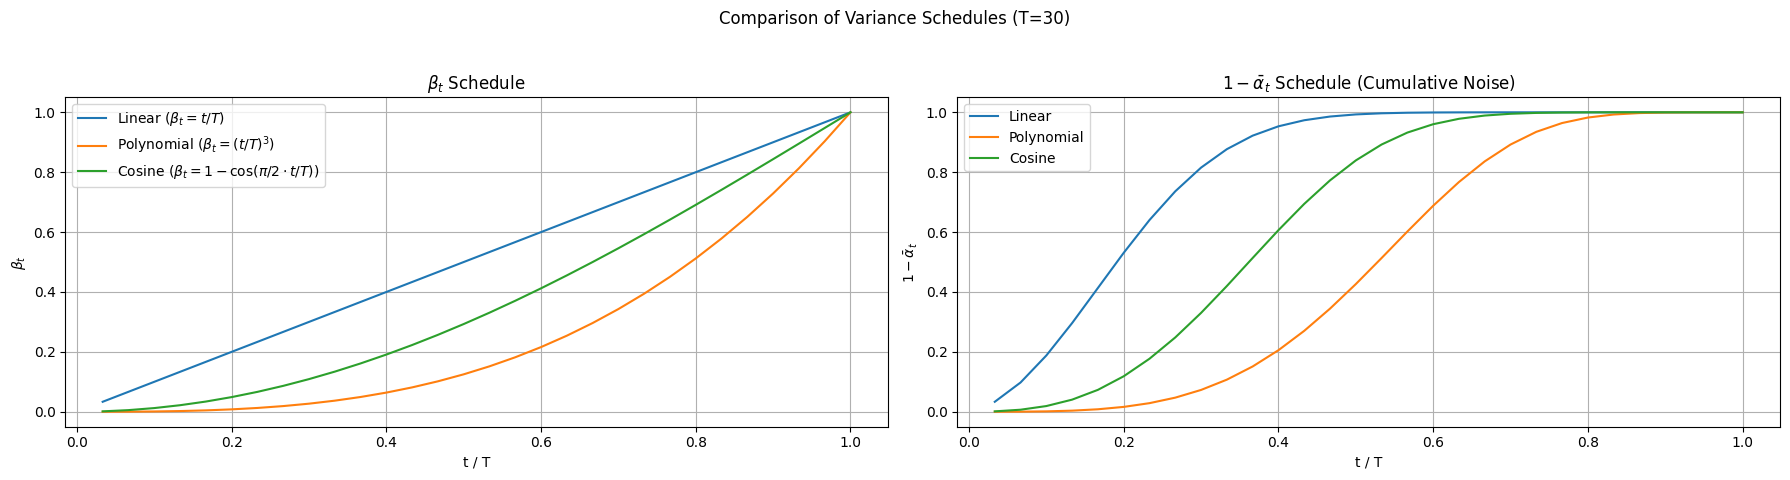

In [1]:
### write your code here
import numpy as np
import matplotlib.pyplot as plt

# Define T
T = 30
timesteps = np.linspace(0, 1, T + 1)[1:]  # t/T from 1/T to T/T

# --- Schedules ---
# 1. Linear Schedule
beta_linear = timesteps
alpha_linear = 1.0 - beta_linear
alpha_bar_linear = np.cumprod(alpha_linear)
one_minus_alpha_bar_linear = 1.0 - alpha_bar_linear

# 2. Polynomial Schedule (power=3)
beta_poly = timesteps**3
alpha_poly = 1.0 - beta_poly
alpha_bar_poly = np.cumprod(alpha_poly)
one_minus_alpha_bar_poly = 1.0 - alpha_bar_poly

# 3. Cosine Schedule (beta_t = 1 - cos(pi/2 * t/T)) - Note: This is NOT the standard DDPM cosine schedule
# The prompt seems to imply beta_t is defined this way, which is unusual.
# The standard DDPM cosine schedule defines alpha_bar_t. Let's implement what the prompt asks for.
beta_cosine_simple = 1.0 - np.cos(np.pi / 2.0 * timesteps)
alpha_cosine_simple = 1.0 - beta_cosine_simple
alpha_bar_cosine_simple = np.cumprod(alpha_cosine_simple)
one_minus_alpha_bar_cosine_simple = 1.0 - alpha_bar_cosine_simple


# --- Plotting ---
plt.figure(figsize=(18, 5))

# Plot beta_t
plt.subplot(1, 2, 1)
plt.plot(timesteps, beta_linear, label='Linear ($\u03B2_t = t/T$)')
plt.plot(timesteps, beta_poly, label='Polynomial ($\u03B2_t = (t/T)^3$)')
plt.plot(timesteps, beta_cosine_simple, label='Cosine ($\u03B2_t = 1 - \cos(\pi/2 \cdot t/T)$)')
plt.xlabel('t / T')
plt.ylabel('$\u03B2_t$')
plt.title('$\u03B2_t$ Schedule')
plt.legend()
plt.grid(True)

# Plot 1 - alpha_bar_t
plt.subplot(1, 2, 2)
plt.plot(timesteps, one_minus_alpha_bar_linear, label='Linear')
plt.plot(timesteps, one_minus_alpha_bar_poly, label='Polynomial')
plt.plot(timesteps, one_minus_alpha_bar_cosine_simple, label='Cosine')
plt.xlabel('t / T')
plt.ylabel('$1 - \\bar{\u03B1}_t$')
plt.title('$1 - \\bar{\u03B1}_t$ Schedule (Cumulative Noise)')
plt.legend()
plt.grid(True)

plt.suptitle('Comparison of Variance Schedules (T=30)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

Based on the observations, [Nichol and Dhariwal, 2021](https://arxiv.org/pdf/2102.09672) proposed to construct a different noise schedule in terms of $\bar{\alpha_t}$:
$$\bar{\alpha_t}= \frac{f(t)}{f(0)}, f(t) = \cos(\frac{t/T+s}{1+s} \cdot \frac{\pi}{2})^2$$

For this schedule, generate plots with y-axis being the value of $\beta_t$ and $1-\bar{\alpha_t}$ and x-axis being the diffusion step $t/T$, and use $s=0.008$ and $T=30$. How does this schedule differ from the previous two, and why might it lead to improved performance in the trained diffusion models?

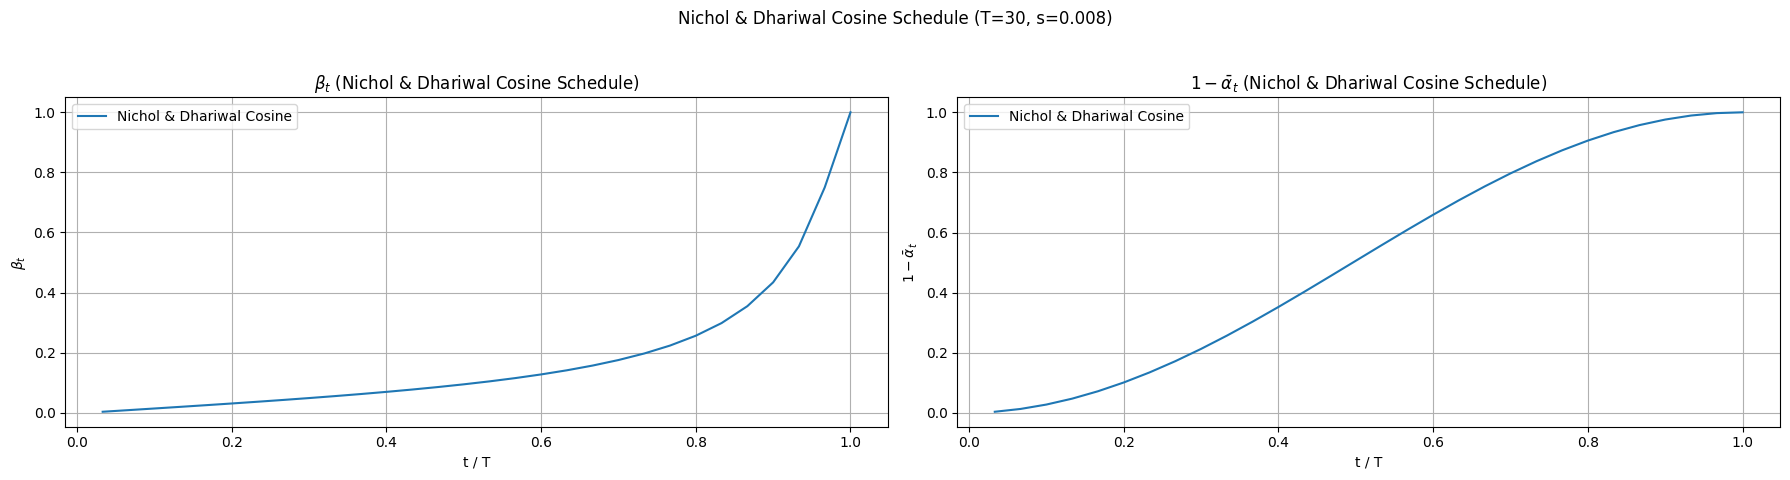

In [2]:
### write your code here

def f(t_ratio, s=0.008):
    return np.cos(((t_ratio + s) / (1 + s)) * (np.pi / 2.0))**2

T = 30
timesteps_nd = np.linspace(0, 1, T + 1)[1:] # t/T from 1/T to T/T
t_indices = np.arange(1, T + 1) # t from 1 to T

# Calculate alpha_bar_t using the Nichol & Dhariwal formula
s = 0.008
f_t = f(t_indices / T, s)
f_0 = f(0, s)
alpha_bar_nd = f_t / f_0

# Ensure alpha_bar is monotonically decreasing
alpha_bar_nd = np.minimum.accumulate(alpha_bar_nd)

# Calculate beta_t from alpha_bar_t
# beta_t = 1 - alpha_t = 1 - (alpha_bar_t / alpha_bar_{t-1})
alpha_bar_nd_prev = np.concatenate(([1.0], alpha_bar_nd[:-1]))
beta_nd = 1.0 - (alpha_bar_nd / alpha_bar_nd_prev)

# Clamp beta_t to avoid numerical issues (e.g., beta_t > 1 or < 0)
# DDPM paper clamps beta_t, Nichol/Dhariwal clamp to <= 0.999
beta_nd = np.clip(beta_nd, a_min=0.0001, a_max=0.999)

one_minus_alpha_bar_nd = 1.0 - alpha_bar_nd

plt.figure(figsize=(18, 5))

# Plot beta_t
plt.subplot(1, 2, 1)
plt.plot(timesteps_nd, beta_nd, label='Nichol & Dhariwal Cosine')
plt.xlabel('t / T')
plt.ylabel('$\u03B2_t$')
plt.title('$\u03B2_t$ (Nichol & Dhariwal Cosine Schedule)')
plt.legend()
plt.grid(True)

# Plot 1 - alpha_bar_t
plt.subplot(1, 2, 2)
plt.plot(timesteps_nd, one_minus_alpha_bar_nd, label='Nichol & Dhariwal Cosine')
plt.xlabel('t / T')
plt.ylabel('$1 - \\bar{\u03B1}_t$')
plt.title('$1 - \\bar{\u03B1}_t$ (Nichol & Dhariwal Cosine Schedule)')
plt.legend()
plt.grid(True)

plt.suptitle(f'Nichol & Dhariwal Cosine Schedule (T={T}, s={s})')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Submission Guideline for Part 2

Please include your answer to all problems, including formulas, proofs, and the figures generated in each problem, excluding code. You are required to submit the (single) pdf and all (four) notebooks (one for each problem) with your code and running outputs. Do not include code in the pdf file. 

Specifically, for Problem 1 in this notebook, the pdf should contain:
- Formulas and proofs for problem 1.1 and 1.2
- 4 figures, one for each beta schedule for problem 1.3
- Answers to the 2 short answer questions about different beta schedules in problem 1.3